In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data\\train.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_df, test_df = train_test_split(train, train_size=0.7,random_state=0)

In [5]:
train_df.shape, test_df.shape

((29399, 785), (12601, 785))

In [7]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
22987,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25862,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
642,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41632,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,29399.000000,29399.0,29399.0,29399.0,29399.0,29399.0,29399.0,29399.0,29399.0,29399.0,...,29399.000000,29399.000000,29399.000000,29399.000000,29399.000000,29399.000000,29399.0,29399.0,29399.0,29399.0
mean,4.468383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.234464,0.132896,0.060376,0.022314,0.024627,0.004082,0.0,0.0,0.0,0.0
std,2.890090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.719155,4.886360,3.278954,1.930835,2.264368,0.495147,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,252.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [9]:
## Check unique label;
set(train['label'])
## we have digit from 0 -9 
## rest 784 column reperesent the image of digit 

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

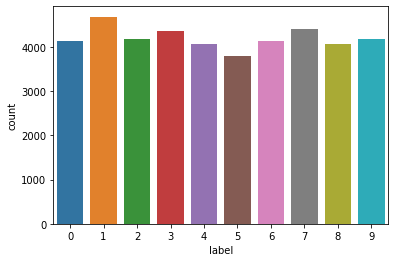

In [10]:
## check the count of each digit 
sns.countplot(train['label'])
plt.show()
## All number have almost same number of data 

In [11]:
## Divide label and image
x_train = train_df.iloc[:,1:]
y_label = train_df.label
x_test = test_df.iloc[:,1:]
y_test_label = test_df.label

In [12]:
## Def a function to display image
def display_image(i):
    img=x_train.iloc[i].to_numpy()
    img=img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title(y_label.iloc[i])
    plt.show()


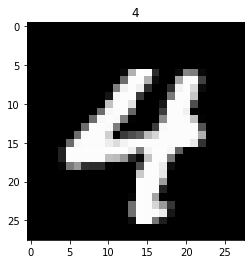

In [13]:
display_image(200) ## look like number is 4


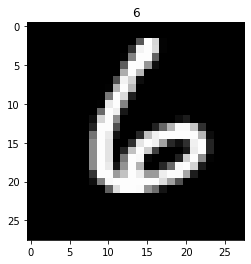

In [14]:
display_image(2000) ## its look like 6

In [15]:
## lets normalized the data, so number will be in range of 0 ,1 
x_train = x_train/255
x_test =  x_test/255 

In [9]:
from sklearn.svm import SVC

In [18]:

model_svm = SVC(kernel='linear')
model_svm.fit(x_train, y_label.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
y_test_predicted = model_svm.predict(x_test)

In [20]:
## Lets test the result
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [21]:
## Check acuracy, and confusion matrix
print(accuracy_score(y_test_label,y_test_predicted))
print(confusion_matrix(y_test_label, y_test_predicted))
print(classification_report(y_test_label, y_test_predicted))

0.9311165780493612
[[1204    0    8    1    3    7   12    0    7    1]
 [   1 1397    6    8    1    1    4    1    8    2]
 [  11   13 1185   17   11    5    7    9   16    2]
 [   4    7   28 1181    2   36    5    6   21    8]
 [   1   10    8    0 1164    1    6    5    3   38]
 [   9    6   11   32    7 1012   11    2   21    8]
 [  10    1   13    0   13   15 1189    0    2    0]
 [   3    7   23    9   14    5    0 1250    4   19]
 [  10   22   15   37    5   31   10    6 1057   11]
 [  12    6   10   12   32    3    1   39   10 1094]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1243
           1       0.95      0.98      0.96      1429
           2       0.91      0.93      0.92      1276
           3       0.91      0.91      0.91      1298
           4       0.93      0.94      0.94      1236
           5       0.91      0.90      0.91      1119
           6       0.96      0.96      0.96      1243
           7     

Here we can liner kernal which is simple vaniala of SVM , did not performed well as compared to KNN in previous file

In [23]:
##  Now check polynomial kernal
model_svm_poly = SVC(kernel='poly', degree=8)
model_svm_poly.fit(x_train, y_label.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
y_test_predicted = model_svm_poly.predict(x_test)


In [25]:
## Check acuracy, and confusion matrix
print(accuracy_score(y_test_label,y_test_predicted))
print(confusion_matrix(y_test_label, y_test_predicted))
print(classification_report(y_test_label, y_test_predicted))

0.83620347591461
[[1151   77    2    0    0    2    8    0    2    1]
 [   0 1413    4    1    1    1    1    0    7    1]
 [  14  190 1053    0    0    2    2    5    7    3]
 [   5  189   10 1058    0    8    0    5   18    5]
 [   3  247    2    0  956    0    5    2    2   19]
 [   9  280    1   14    1  790   10    0   12    2]
 [  10  154    0    0    0    5 1071    0    3    0]
 [   0  250   14    1    2    0    0 1044    8   15]
 [  15  146    4   19    3   12    4    2  994    5]
 [  14  169    1    1    6    1    0   12    8 1007]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1243
           1       0.45      0.99      0.62      1429
           2       0.97      0.83      0.89      1276
           3       0.97      0.82      0.88      1298
           4       0.99      0.77      0.87      1236
           5       0.96      0.71      0.81      1119
           6       0.97      0.86      0.91      1243
           7       

In [27]:
##  Now check Gaussian Kernel
model_svm_rbf = SVC(kernel='rbf')
model_svm_rbf.fit(x_train, y_label.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
y2_test_predicted = model_svm_rbf.predict(x_test)

In [29]:
## Check acuracy, and confusion matrix
print(accuracy_score(y_test_label,y2_test_predicted))
print(confusion_matrix(y_test_label, y2_test_predicted))
print(classification_report(y_test_label, y2_test_predicted))

0.9740496785969367
[[1226    0    2    0    2    3    6    0    4    0]
 [   0 1409    7    3    1    0    2    1    5    1]
 [   3    0 1250    3    3    1    0    8    7    1]
 [   1    2   12 1243    1   15    2    5   13    4]
 [   1    4    2    0 1202    1    4    2    0   20]
 [   1    0    3    7    1 1093    9    0    2    3]
 [   7    0    0    0    3    6 1225    0    2    0]
 [   2    5    8    2    9    2    0 1288    4   14]
 [   2    9    3    8    3    6    5    0 1165    3]
 [   7    2    3    7   10    2    0   13    2 1173]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1243
           1       0.98      0.99      0.99      1429
           2       0.97      0.98      0.97      1276
           3       0.98      0.96      0.97      1298
           4       0.97      0.97      0.97      1236
           5       0.97      0.98      0.97      1119
           6       0.98      0.99      0.98      1243
           7     

In [30]:
##  Now check sigmoid Kernel
model_svm_sigmoid = SVC(kernel='sigmoid')
model_svm_sigmoid.fit(x_train, y_label.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
y3_test_predicted = model_svm_sigmoid.predict(x_test)

In [32]:
## Check acuracy, and confusion matrix
print(accuracy_score(y_test_label,y3_test_predicted))
print(confusion_matrix(y_test_label, y3_test_predicted))
print(classification_report(y_test_label, y3_test_predicted))

0.7909689707166098
[[1050    0   36    3    5  102   21    1   25    0]
 [   0 1366   13   17    0    9    4    0   20    0]
 [  27   24  984   35   38   13   71    9   70    5]
 [  35   13   61  942    0  146   14   14   64    9]
 [   7   10   16    0 1040   11   28    4   21   99]
 [  71   39    7  117   28  720   27    3   98    9]
 [  19    5   79    3   22   31 1060    0   24    0]
 [  37   11   40    9   29   10    1 1097   16   84]
 [  14   71   50   40   24  121   10    5  846   23]
 [  26    6   14   18  122   31    0   88   52  862]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1243
           1       0.88      0.96      0.92      1429
           2       0.76      0.77      0.76      1276
           3       0.80      0.73      0.76      1298
           4       0.80      0.84      0.82      1236
           5       0.60      0.64      0.62      1119
           6       0.86      0.85      0.86      1243
           7     

sigmoid work well with binary classification we we can see here less accuracy

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [34]:
len(x_train), len(y_label)


(29399, 29399)

In [35]:
x_train_new = x_train.iloc[:5000]
y_label_new = y_label.iloc[:5000]

In [46]:
len(x_train_new), len(y_label_new)

(5000, 5000)

In [36]:
## Now lets work on optimizing the k value of KNN by cross validation and GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}

SVC_grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

## Now fit the model
SVC_grid.fit(x_train_new, y_label_new)

... C=10, gamma=1, kernel=sigmoid, total= 1.0min
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   8.3s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   8.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=  10.3s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=  10.9s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   9.7s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=  50.3s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... 

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [39]:
SVC_grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
## final model 
model_svm_final= SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

model_svm_final.fit(x_train, y_label.values.ravel())


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
y4_test_predicted = model_svm_final.predict(x_test)

In [42]:
print(accuracy_score(y_test_label,y4_test_predicted))
print(confusion_matrix(y_test_label,y4_test_predicted))
print(classification_report(y_test_label,y4_test_predicted))

0.9772240298389017
[[1230    0    5    1    0    1    3    0    3    0]
 [   0 1413    6    2    1    0    1    2    3    1]
 [   3    0 1252    2    1    0    1    7    8    2]
 [   0    2    9 1252    2   12    1    3   11    6]
 [   1    4    2    0 1201    1    5    3    0   19]
 [   2    0    1    9    3 1093    6    0    3    2]
 [   6    0    1    0    2    5 1227    0    2    0]
 [   1    4    7    0    8    2    0 1299    2   11]
 [   4    3    4    8    3    4    4    0 1169    5]
 [   6    1    1    6    9    4    0   10    4 1178]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1243
           1       0.99      0.99      0.99      1429
           2       0.97      0.98      0.98      1276
           3       0.98      0.96      0.97      1298
           4       0.98      0.97      0.97      1236
           5       0.97      0.98      0.98      1119
           6       0.98      0.99      0.99      1243
           7     

In [13]:
## lets prepare for submission 
train = pd.read_csv('data\\train.csv')
test = pd.read_csv('data\\test.csv')


In [14]:
from sklearn import svm
x_train = train.iloc[:,1:]
y_label = train.label
x_test = test
x_train = x_train/255
x_test =  x_test/255 

In [15]:
model_svm_submit = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
    
model_svm_submit.fit(x_train, y_label.values.ravel())


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
predict = model_svm_submit.predict(x_test)

In [12]:
predict

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [24]:
df = pd.DataFrame(predict)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('output.csv', header=True)

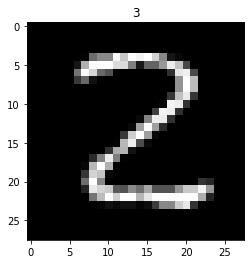

In [23]:
## do a random check 
i=90
img=x_test.iloc[i].to_numpy()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y_label.iloc[i])
plt.show()